# Sinusoidal Regression
*The goal of regression is to predict the value
of one or more continuous target variables t given the value of a D-dimensional vector x of input variables.*

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
gd = pd.read_csv('src/temperatures.csv', header=None, names = ['Temperature'])
df = pd.read_csv('src/temperatures.csv', header=None)

# Create the X values
X = np.linspace(0, 100, len(df))  # Generating 100 evenly spaced X values

# Convert the temperature column to a NumPy array
Y = df[0].values  # Temperatures are in the first column



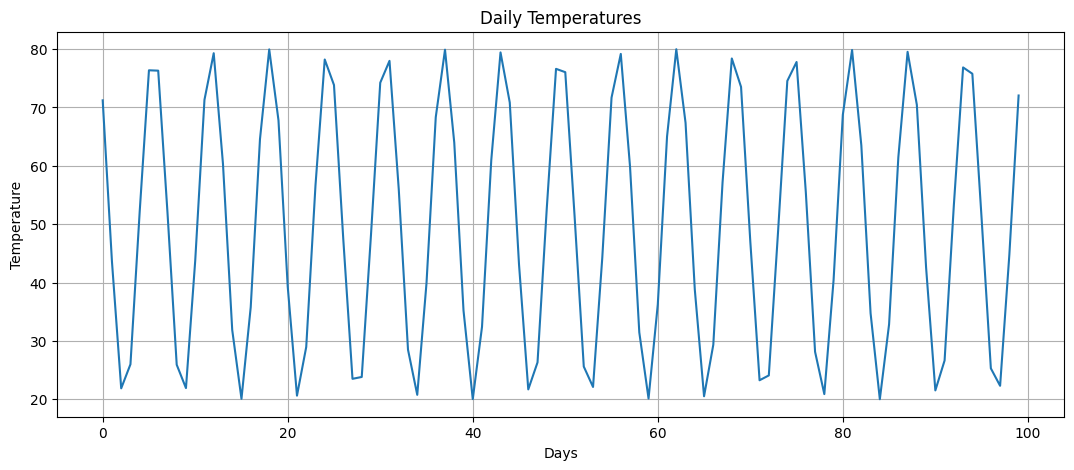

In [38]:

plt.figure(figsize=(13,5))
# Line plot to see temperature trends
sns.lineplot(data=gd['Temperature'])
plt.grid()
plt.title('Daily Temperatures')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()

In [39]:
# Some basic statistics
print(df.describe())

                0
count  100.000000
mean    49.835852
std     21.255238
min     20.021208
25%     28.415242
50%     49.867323
75%     71.236622
max     79.967635


### Step 1: Define the Sinusoidal Model Function

The following Python function defines a **sinusoidal model** (for one feature) using the equation:

$$
h(x_i) = a \cdot \sin(b \cdot x_i + c) + d
$$

Where: $h(x_i)$ is called "hypothesis"

A machine learning [`hypothesis`](https://machinelearningmastery.com/what-is-a-hypothesis-in-machine-learning/) is a candidate model that approximates a target function for mapping inputs to outputs. 

In [40]:
def sinusoidal(X, a, b, c, d):
    """
    This function defines a sinusoidal model with the equation:
    
    h(x_i) = a * sin(b * x_i + c) + d
    
    Parameters:
    X : array-like
        The independent variable or input data (e.g., time or another continuous variable).
    a : float
        The amplitude of the sine wave, which defines the peak height of the wave.
    b : float
        The frequency multiplier, which controls how many oscillations the sine wave completes.
    c : float
        The phase shift, which adjusts the starting point of the wave along the X-axis.
    d : float
        The vertical shift, which moves the wave up or down along the Y-axis.
    
    Returns:
    array-like
        The values of the sinusoidal function at each point in X.
    """
    return a * np.sin(b * X + c) + d


### Step 2: Define the Loss Function (MSE) for Sinusoidal Regression

As the name suggests, MSE is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction. However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

The **MSE** is computed as:

$$
\text{MSE} = L(x_i) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - h(X_i, a, b, c, d))^2
$$

Where:
- \( y_i \) is the actual value for the \( i \)-th observation.
- \( h(X_i, a, b, c, d) \) is the predicted value using the sinusoidal model.
- \( m \) is the number of observations (data points).


In [47]:
def mse_loss(Y_actual, Y_predicted):
    """
    Loss function: Mean Squared Error (MSE) for Sinusoidal Regression
    
    Args:
        y (list): actual output values
        y' (list): expected output values
    
    Returns:
        float: result of MSE
    """
    
    return np.mean((Y_actual - Y_predicted) ** 2)


### Step 3: Define the Gradient Descent Function with Better Initialization

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

#### Derivatives (Gradients)

To minimize the **Mean Squared Error (MSE)** between the predicted and actual values, we need to compute the partial derivatives of the MSE with respect to the parameters `a`, `b`, `c`, and `d`. These derivatives, or gradients, tell us how to adjust each parameter to reduce the error.

1. **Gradient with respect to `a` (amplitude)**:
   $$
   \frac{\partial}{\partial a} L(x_i) = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - h(X_i, a, b, c, d) \right) \cdot \sin(b \cdot X_i + c)
   $$
   
2. **Gradient with respect to `b` (frequency multiplier)**:
   $$
   \frac{\partial}{\partial b} L(x_i) = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - h(X_i, a, b, c, d) \right) \cdot a \cdot X_i \cdot \cos(b \cdot X_i + c)
   $$
   
3. **Gradient with respect to `c` (phase shift)**:
   $$
   \frac{\partial}{\partial c} L(x_i) = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - h(X_i, a, b, c, d) \right) \cdot a \cdot \cos(b \cdot X_i + c)
   $$
   
4. **Gradient with respect to `d` (vertical shift)**:
   $$
   \frac{\partial}{\partial d} L(x_i) = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - h(X_i, a, b, c, d) \right)
   $$

In [43]:
def gradient_descent(X, Y, learning_rate=0.000001, epochs=100000):
    """
    Gradient Descent function for optimizing the sinusoidal regression model.
    
    Args:
        X (list or array): input feature values.
        Y (list or array): actual output values.
        learning_rate (float): step size for updating parameters (default is 0.0001).
        epochs (int): number of iterations (default is 10000).
    
    Returns:
        a (float): optimized amplitude.
        b (float): optimized frequency.
        c (float): optimized phase shift.
        d (float): optimized vertical shift.
    """
    
    # Initialize parameters closer to expected values
    a, b, c, d = 30, 1.0, 0.5, 50  # Initial guesses for parameters

    # Convert X and Y to NumPy arrays for element-wise operations
    X = np.array(X)
    Y = np.array(Y)
    
    n = len(Y)  # Number of data points
    
    for it in range(epochs):
        # Predict Y using the current parameters
        Y_pred = sinusoidal(X, a, b, c, d)
        
        # Compute gradients with respect to each parameter
        grad_a = (-2/n) * np.sum((Y - Y_pred) * np.sin(b * X + c))
        grad_b = (-2/n) * np.sum((Y - Y_pred) * a * X * np.cos(b * X + c))
        grad_c = (-2/n) * np.sum((Y - Y_pred) * a * np.cos(b * X + c))
        grad_d = (-2/n) * np.sum((Y - Y_pred))
        
        # Update parameters
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d
        
        # Optionally, print the loss to monitor progress every 10000 epochs
        if it % 10000 == 0:
            loss = mse_loss(Y, Y_pred)  # Use the custom error function here
            print(f"Epoch {it}, MSE: {loss}")
    
    # Return the optimized parameters
    return a, b, c, d


### Application

Epoch 0, MSE: 711.5601071553616
Epoch 10000, MSE: 246.05547266202268
Epoch 20000, MSE: 177.85555197212085
Epoch 30000, MSE: 124.32564824859071
Epoch 40000, MSE: 84.55557644495613
Epoch 50000, MSE: 56.290108436805006
Epoch 60000, MSE: 36.87739157707307
Epoch 70000, MSE: 23.879643216601824
Epoch 80000, MSE: 15.335289746368288
Epoch 90000, MSE: 9.790874928829613
Epoch 100000, MSE: 6.225563742742511
Epoch 110000, MSE: 3.947287290475648
Epoch 120000, MSE: 2.497788717320303
Epoch 130000, MSE: 1.578384879893769
Epoch 140000, MSE: 0.9964608934055866
Epoch 150000, MSE: 0.6286974891000159
Epoch 160000, MSE: 0.3965306774594955
Epoch 170000, MSE: 0.2500800009699862
Epoch 180000, MSE: 0.15775190166051625
Epoch 190000, MSE: 0.09956931578535844
Epoch 200000, MSE: 0.06291576015820143
Epoch 210000, MSE: 0.03983031543159656
Epoch 220000, MSE: 0.025292931981390897
Epoch 230000, MSE: 0.016139548252606075
Epoch 240000, MSE: 0.010376619526318711
Epoch 250000, MSE: 0.006748436543431607
Epoch 260000, MSE: 0.0

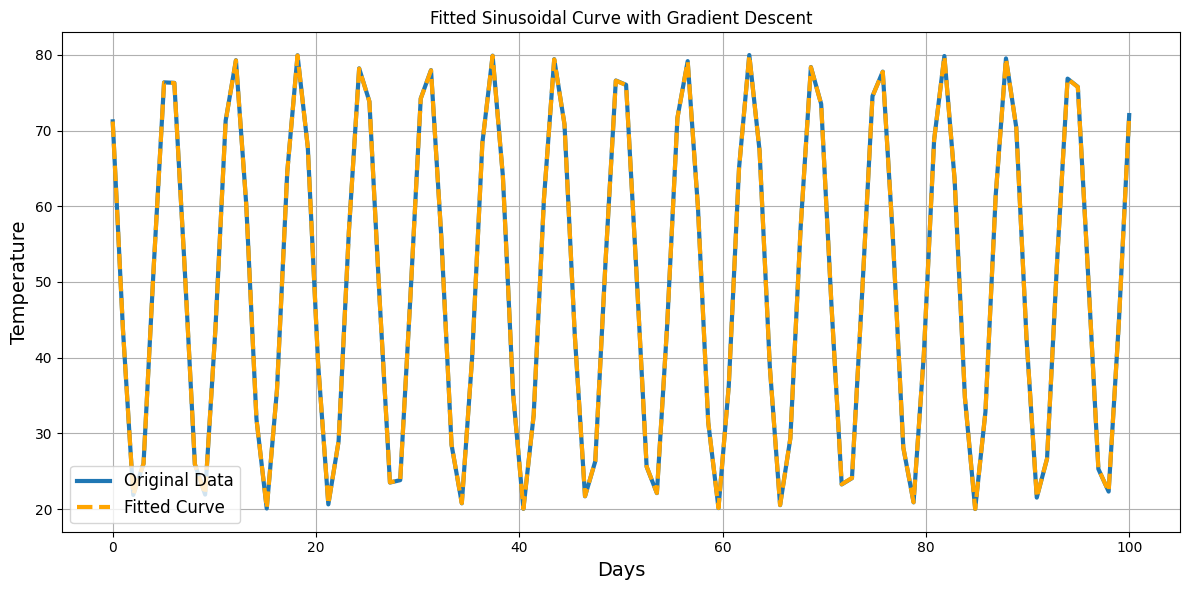

In [48]:
# Apply gradient descent to find the best parameters
learning_rate = 0.0000001  # Adjusted learning rate for better convergence
epochs = 1000001  # Number of iterations to converge
a, b, c, d = gradient_descent(X, Y, learning_rate, epochs)

# Generate the fitted values using the learned parameters
Y_fitted = sinusoidal(X, a, b, c, d)

# Plot the original data and the fitted curve
plt.figure(figsize=(12, 6))
plt.plot(X, Y, label='Original Data', linewidth=3)
plt.plot(X, Y_fitted, label='Fitted Curve', linestyle='--', color='orange', linewidth=3)
plt.grid(True)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.title(f'Fitted Sinusoidal Curve with Gradient Descent')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
